In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from scipy import stats


In [2]:
start_date='1/1/2017'

In [3]:
end_date ='6/1/2017'

In [4]:
x_date = pd.date_range(start_date,end_date)

In [5]:
hand_amount_per_day = 10000
bet_per_hand = 50
ev_for_house = 0.027


In [6]:
def no_swing(hand_amount_per_day,bet_per_hand,ev_for_house) -> float:
    return hand_amount_per_day*bet_per_hand*ev_for_house

In [7]:
house_res = np.array([no_swing(hand_amount_per_day,bet_per_hand,ev_for_house) for _ in x_date])
hand_period = [hand_amount_per_day for _ in x_date]
bet_period = [bet_per_hand for _ in x_date]

In [8]:
def show_gragh(x_date,house_res,hand_period,bet_period):
    f, ax = plt.subplots(3, 1)
    f.set_size_inches(9, 7)     # размер 9 x 7 дюймов
    f.set_facecolor('#eee')     # цвет фона (светло-серый)
    ax[0].set_ylabel('Hand Amount')
    ax[0].plot(x_date, hand_period)
    ax[0].grid()
    ax[0].xaxis.set_major_formatter(NullFormatter())
    ax[1].set_ylabel('Bet per hand')
    ax[1].plot(x_date, bet_period)
    ax[1].grid()
    ax[1].xaxis.set_major_formatter(NullFormatter())
    ax[2].set_ylabel('Day result')
    house_res_ev = np.full_like(house_res,house_res.mean())
    ax[2].plot(x_date, house_res)
    ax[2].plot(x_date, house_res_ev)
    ax[2].grid()
    ax[2].tick_params(axis='x', labelrotation=45)
    plt.show()

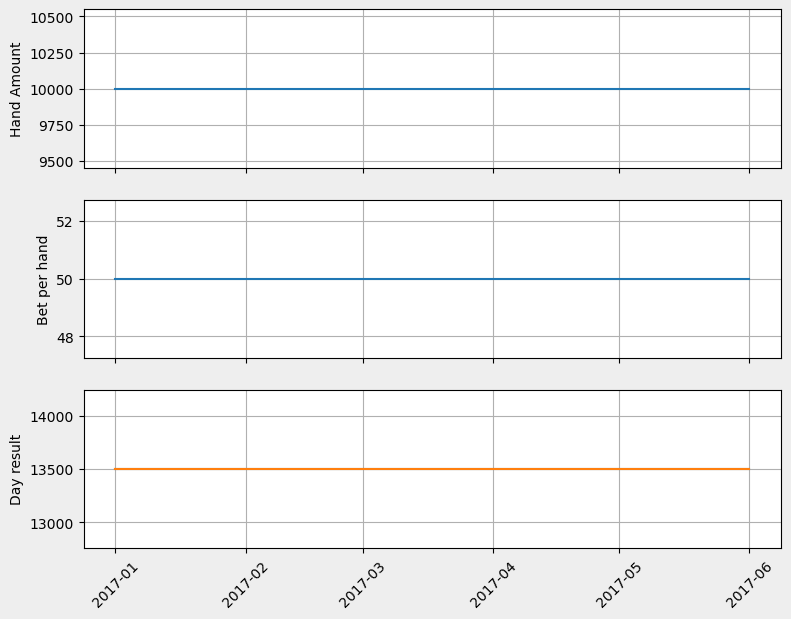

In [9]:
show_gragh(x_date,house_res,hand_period,bet_period)

In [10]:
std_one_hand = 1.1

In [11]:
def count_std_per_day(std_one_hand,hand_amount_per_day,bet_per_hand) -> float:
    return std_one_hand*(hand_amount_per_day**0.5)*bet_per_hand

In [12]:
std_per_day = count_std_per_day(std_one_hand,hand_amount_per_day,bet_per_hand)

In [13]:
norm_gen = stats.norm(0,std_per_day)

In [14]:
norm_gen.rvs()

np.float64(-7616.27067673392)

In [15]:
house_res_std = np.array([no_swing(hand_amount_per_day,bet_per_hand,ev_for_house)+norm_gen.rvs() for _ in x_date])

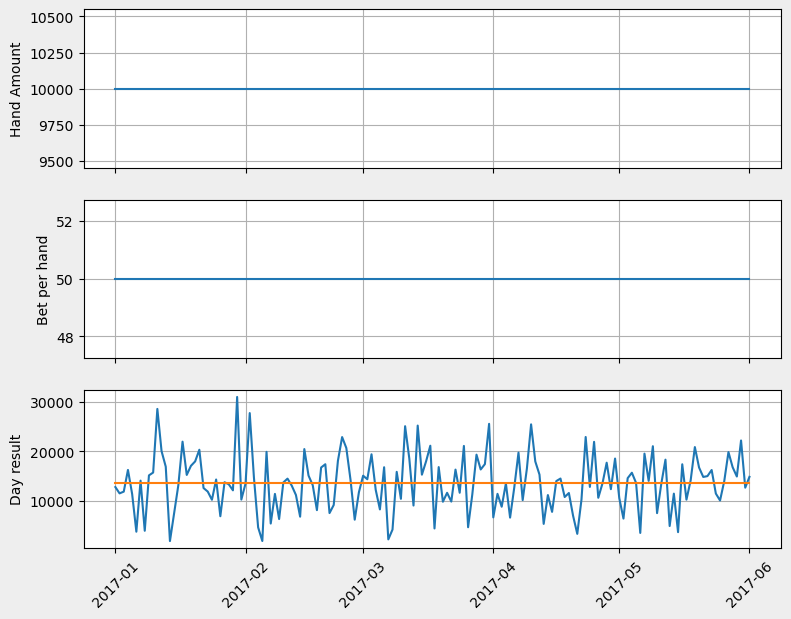

In [16]:
show_gragh(x_date,house_res_std,hand_period,bet_period)

In [17]:
house_res_std.mean()

np.float64(13681.437365434273)

In [18]:
ts = pd.Timestamp(x_date[0])

In [19]:
ts.weekday()

6

In [20]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [21]:
week_day_coef=[0.5,0.6,0.7,0.6,1.2,1.3,1]

<StemContainer object of 3 artists>

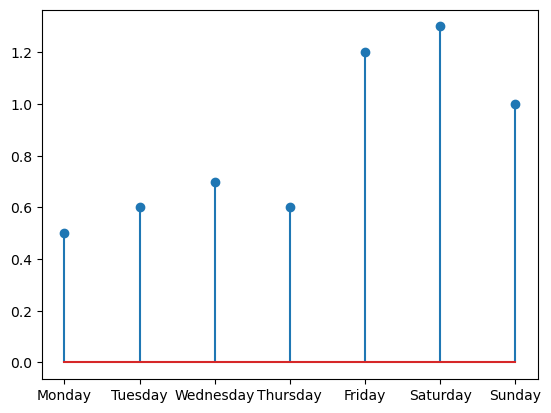

In [22]:
plt.stem(days,week_day_coef)

In [23]:
def house_res_swing_and_weekly(hand_amount_per_day,bet_per_hand,ev_for_house,std_one_hand,week_day_coef,date) -> float:
    ts = pd.Timestamp(date)
    day_coeff = week_day_coef[ts.weekday()]
    hand_this_day = hand_amount_per_day*day_coeff
    bet_this_day = bet_per_hand*day_coeff
    ev_day = bet_this_day*hand_this_day*ev_for_house
    return stats.norm(ev_day,std_one_hand*bet_per_hand*(hand_this_day**0.5)).rvs()
    

In [24]:
house_res_std_weekle = np.array([house_res_swing_and_weekly(hand_amount_per_day,bet_per_hand,ev_for_house,std_one_hand,week_day_coef,date) for date in x_date])

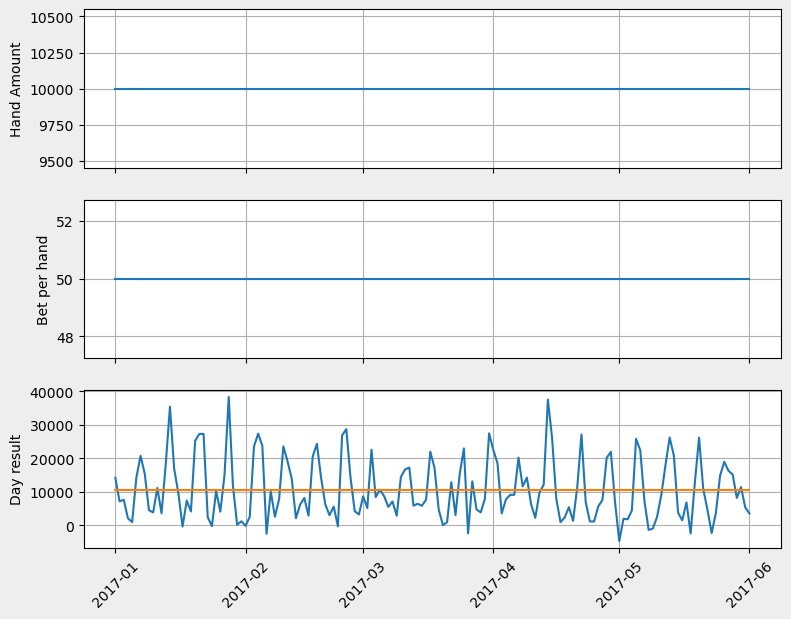

In [25]:
show_gragh(x_date,house_res_std_weekle,hand_period,bet_period)

In [27]:
week_day_coef_np=np.array([0.5,0.6,0.7,0.6,1.2,1.3,1])

In [28]:
week_day_coef_np.std()

np.float64(0.29692299558323615)